> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset - [No-show appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
>In this dataset it is intended to use data provided from 100K medical appointments in different regions in Brazil, to figure out the factors that could affect the probability that the patient will show in his appointment so that in future appointments we could have a better prediction of whether the patient is going to show in his appointment or not based on his information.

### Question(s) for Analysis
> In this dataset I will focus on the propability of patients showing in their appointments according to whether they are handicapped or no. How does having certain disease such as hypertension affects this propability? And is there a correlation between showing up in the appointment and the patient's age?

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

running this line of code always results in errors!
If I run it then run 'df.head' it shows TypeError: __init__() got an unexpected keyword argument 'max_rows'. So I just skipped it, also I have done the analysis without dataframe.explode() function.

In [110]:
# Upgrade pandas to use dataframe.explode() function. 
#!pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

I started by loading the dataset I have chosen and printing out a fewe lines

In [3]:
df = pd.read_csv('Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv') 
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


after looking at the first rows in the dataset, now I will look for the number of rows and columns in it.

In [4]:
df.shape

(110527, 14)

now I have the number of rows and columns, I going to see some properties of the dataset.

In [5]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


according to the information above, the dataset has patients with varying ages from '-1' (which is considered as the patient is not born yet, pregnant woman - according to the creator of the dataset) to '115' with most of the patients in a range of 18 to 55 years old. Also, most of the patients have no scholarships, about 20% of them have hypertension, also a very low percentage of them are diabetic, alcoholic, or handicapped, and almost a third of them received a reminder SMS.
Now I am checking what are the columns with null values if any.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


looks like the dataset have no missing values.
Now I am looking for unique values in each column of the dataset to check that there is no irrational data.

In [7]:
#loop in each column in the dataset
for i in df.columns:
    #set the unique values in each column in the variable 'x', then print it
    x = df['{}'.format(i)].unique()
    print(x)

[  2.98724998e+13   5.58997777e+14   4.26296230e+12 ...,   7.26331493e+13
   9.96997666e+14   1.55766317e+13]
[5642903 5642503 5642549 ..., 5630692 5630323 5629448]
['F' 'M']
['2016-04-29T18:38:08Z' '2016-04-29T16:08:27Z' '2016-04-29T16:19:04Z' ...,
 '2016-04-27T16:03:52Z' '2016-04-27T15:09:23Z' '2016-04-27T13:30:56Z']
['2016-04-29T00:00:00Z' '2016-05-03T00:00:00Z' '2016-05-10T00:00:00Z'
 '2016-05-17T00:00:00Z' '2016-05-24T00:00:00Z' '2016-05-31T00:00:00Z'
 '2016-05-02T00:00:00Z' '2016-05-30T00:00:00Z' '2016-05-16T00:00:00Z'
 '2016-05-04T00:00:00Z' '2016-05-19T00:00:00Z' '2016-05-12T00:00:00Z'
 '2016-05-06T00:00:00Z' '2016-05-20T00:00:00Z' '2016-05-05T00:00:00Z'
 '2016-05-13T00:00:00Z' '2016-05-09T00:00:00Z' '2016-05-25T00:00:00Z'
 '2016-05-11T00:00:00Z' '2016-05-18T00:00:00Z' '2016-05-14T00:00:00Z'
 '2016-06-02T00:00:00Z' '2016-06-03T00:00:00Z' '2016-06-06T00:00:00Z'
 '2016-06-07T00:00:00Z' '2016-06-01T00:00:00Z' '2016-06-08T00:00:00Z']
[ 62  56   8  76  23  39  21  19  30  29  22  28

the dataset values are rational and indicates that it is already pretty clean to start the EDA process. 
Before begining the EDA process I will just check if there's duplicated rows in the dataset.

In [8]:
#checking for duplicated data according to the appointmentID
df.duplicated('AppointmentID').sum()

0

no duplicated rows to drop here. Just a last step in investigating the dataset to look at a histogram of the dataset.

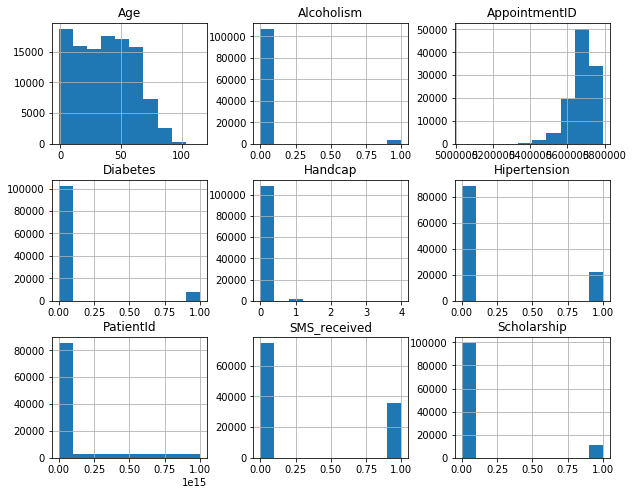

In [9]:
df.hist(figsize=(10,8));

data visualized using the histograms confirms the interpretation of the '.describe()' step done earlier in this project. 20% percent of the patients have hypertension, a third of them got a SMS and most patients are younger than 50 years old, after that point age is skewed to the right.


### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

although the data is pretty clean to start EDA, changing names of some columns would help clarifying them.
Hypertension is abbreviated HTN

In [11]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
df.rename(columns = {'Hipertension': 'HTN', 'Handcap': 'Handicap', 'No-show': 'No_show'}, inplace=True)

since patientId and appointmentID are personal information about the patient and would not be useful in the analysis process, I just dropped them from the dataset before EDA

In [12]:
df.drop(['PatientId', 'AppointmentID'], axis = 1, inplace = True)

In [13]:
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,HTN,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [14]:
df.shape

(110527, 12)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 12 columns):
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
HTN               110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handicap          110527 non-null int64
SMS_received      110527 non-null int64
No_show           110527 non-null object
dtypes: int64(7), object(5)
memory usage: 10.1+ MB


as a last step in cleaning the data, I will add a column to the dataset to represent the 'No_show' column in binary, so that it will be easier to deal with in the next visualizations. 

In [16]:
df['no_show'] = df['No_show'].map({'Yes': 1, 'No': 0})

In [17]:
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,HTN,Diabetes,Alcoholism,Handicap,SMS_received,No_show,no_show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No,0
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0


now that the dataset is clean enough, it is time to begin the EDA

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 



> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.


### Research Question 1:  Are Handicaped People More Likely to Show?

first I will start by creating 2 functions which I will use to answer my questions, to avoid redundancy.

In [131]:
def d1_plt(df, x_axis):
    '''
    docstring:
    this function will create a bar chart that visuallizes 
    the number of appointments according to 
    whether or not they have certain characteristic 
    of those mentioned above in the table
    input:
    x_axis the independant variable that will be explored
    output:
    bar chart visualizing the number of each category in the x_axis
    '''
    #plotting the data
    df[x_axis].value_counts().plot.bar(edgecolor='black', figsize=[11, 7], rot=0, width=0.8)
    #replacing the '_' with ' '
    x_axis = x_axis.replace('_',' ')
    plt.title(f'Number of Appointments by {x_axis}'.title(), weight='bold')
    plt.xlabel(x_axis.title())
    plt.ylabel('Number of Appointments')
    plt.legend();

In [132]:
def d2_plt(df, x_axis, y_axis='no_show'):
    '''
    docstring:
    the function here will create a bar chart 
    to visuallize the mean probability of attendence of the patient 
    according to whether or not they have certain characteristic 
    of those mentioned above in the table 
    inputs:
    df is the main created dataframe
    xaxis is the independant variable that will be explored against the dependant variable
    yaxis is the dependant variable
    outputs:
    the output will be a bar plot of the independant variable against the dependant one
    '''
    #store in data the mean of y_axis after grouping by x_axis
    data = df.groupby(x_axis)[y_axis].mean()
    #plotting the data
    data.plot.bar(figsize=(11, 7), edgecolor='black', rot=0, width=0.7)
    #creating a reference line 
    plt.axhline(df[y_axis].value_counts(normalize=True)[1], color='red', ls='-.', alpha=0.6, label='all patients')
    #replacing the '_' with ' '
    x_axis = x_axis.replace('_',' ')
    y_axis = y_axis.replace('_',' ')
    plt.title(f'probability of {y_axis} by {x_axis}'.title(), weight='bold')
    plt.xlabel(x_axis.title())
    plt.ylabel(f'probability of {y_axis}'.title())
    #zooming into the plot 
    plt.ylim(data.min()*0.9, data.max()*1.1)
    plt.legend();

I will create a new variable in the dataframe to make the exploration according to it.

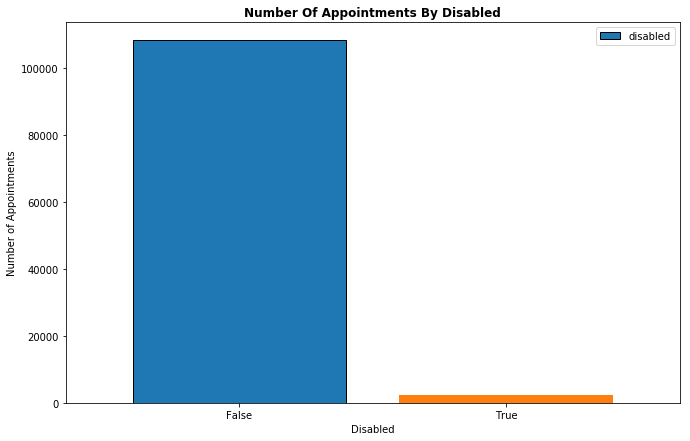

In [133]:
df['disabled'] = df['Handicap'] >= 1
d1_plt(df, 'disabled')

the chart shows that the vast majority of the appointments were to patients that are not disabled

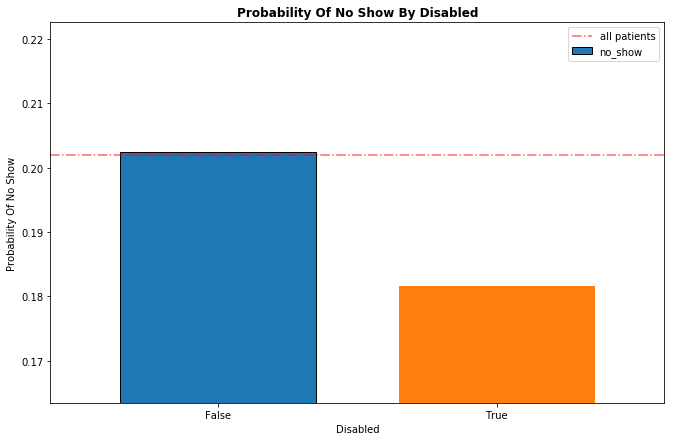

In [134]:
d2_plt(df, 'disabled')

since '0' means that the patient attended and '1' means that they did not, so as the mean gets closer to '0' the propability of showing increases, and as it (the mean) gets closer to '1' the propablility of showing decreases. Therefore, this bar plot above shows that disabled people are slightly more likely to show, more than people with no disabilities.

### Research Question 2: Are Hypertensive Patients More Likely to Show Than Other Normal People?

starting by making a new variable (hypertensive) in the dataframe, then plotting it using the function again. 

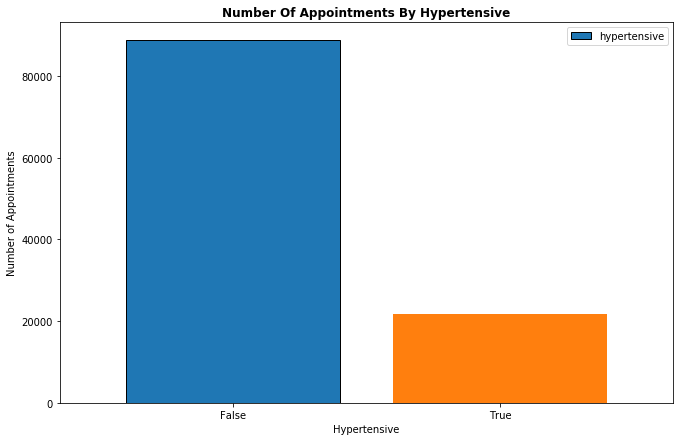

In [135]:
df['hypertensive'] = df['HTN'] == 1
d1_plt(df, 'hypertensive')

the chart shows that about fifth of the patients suffers from hypertension

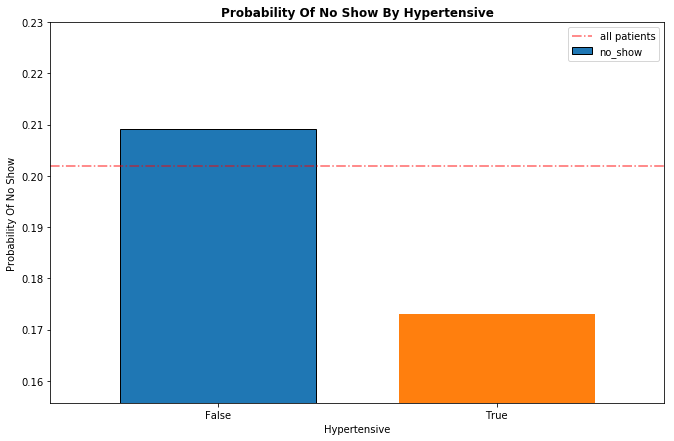

In [136]:
d2_plt(df, 'hypertensive')

it is obvious also that patients with hypertension would show higher propability of attending their appointments compared to those who are not.

### Research Question 3: How Age Affects Showing?

first I will create categories of numerical data using '.cut()'. I will categorize age as all of those below 18 but greater than 0 (not including the irrational '-1' value), then plot these categories.

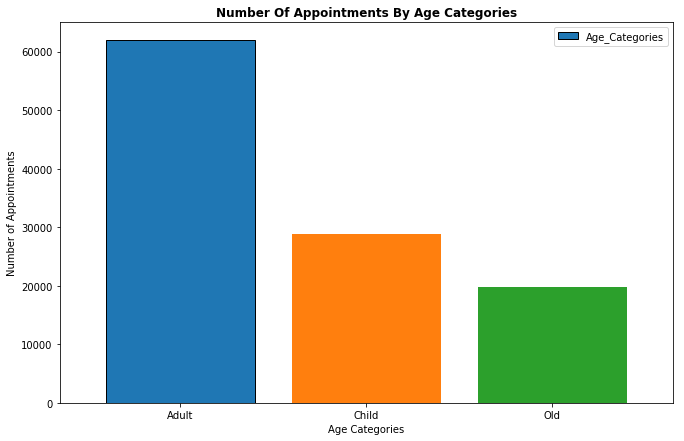

In [137]:
age_stage = [0, 18, 60, df['Age'].max()]
stage_name = ['Child', 'Adult', 'Old']

df['Age_Categories'] = pd.cut(df['Age'], bins = age_stage, labels = stage_name, include_lowest = True)
d1_plt(df, 'Age_Categories')

the chart shows that about half of the appointments were made by adults - people older than 18 and younger than 60

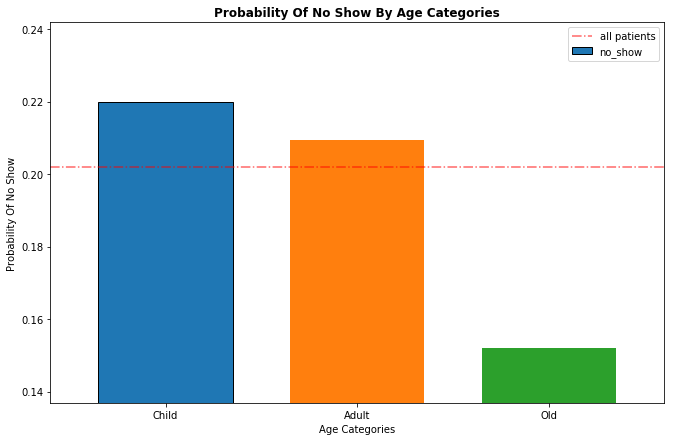

In [138]:
d2_plt(df, 'Age_Categories')

according to this bar chart above old patients have a significant higher propability to show in their appointments. For further investigation of this correlation here I will plot a histogram to show the real numbers.

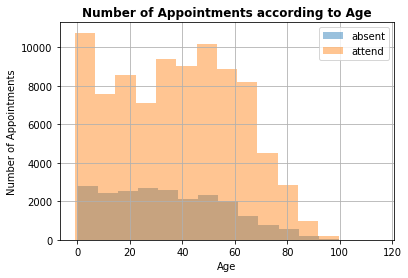

In [139]:
#creating masks to grap rows with people that attended their appointments
#and those who did not
absent = df.no_show == 1
attend = df.no_show == 0

df.Age[absent].hist(alpha=0.45, bins=15, label='absent')
df.Age[attend].hist(alpha=0.45, bins=15, label='attend')
plt.title('Number of Appointments according to Age', weight='bold')
plt.xlabel('Age')
plt.ylabel('Number of Appointments')
plt.legend();

the histogram shows that the number of people that attend and those who do not is pretty much consistent until the age 60 where the number of people who do not attend decreases significantly than people that attend, untill we hit the age 80 where almost all patients attend their appointments.

<a id='conclusions'></a>
## Conclusions

>we can conclude that handicapped people generally have more tendency to show at their appointments, also patients with hypertension tend to attend more than those who do not. And people older than 60 years old stick to their appointments more than adults and children, which may be because adult people are busy with other appointments so they forget about others in the hospital, but this also may be interpreted as the significantly decreasing number of old patients in this dataset. The point of age therefore is a limitation and needs to be further investigated to find out why the number of old people is significantly small which led to a skewed to the right histogram.


## Submitting your Project 


In [140]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0